<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/taller_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#1.1 Consultar y realizar los ejercicios propuestos en el cuadernoTransformada de Fourier.


# Punto 1:

Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

**Solucion:**

La Transformada Rápida de Fourier (FFT) es un algoritmo eficiente para calcular la Transformada Discreta de Fourier (DFT). La DFT, a su vez, descompone una señal discreta en el dominio del tiempo en un conjunto de componentes sinusoidales (armónicos) a diferentes frecuencias.

Aquí los puntos clave del modelo que utiliza la FFT:

1. Señal Discreta y Finita: La FFT opera sobre una
señal discreta y de longitud finita, denotada como $x[k]$, donde $k$ es el índice de tiempo discreto y va de 0 a $K-1$, siendo $K$ la longitud de la señal.

2. Bases Ortogonales: La FFT descompone la señal $x[k]$ utilizando un conjunto de funciones sinusoidales discretas como bases. Estas bases son ortogonales, lo que significa que son linealmente independientes y se pueden utilizar para representar cualquier señal de longitud $K$ como una combinación lineal de estas bases. Las bases están dadas por $e^{j \frac{2\pi nk}{K}}$, donde $n$$n$ es el índice de frecuencia discreta.

3. Cálculo de Coeficientes (Armónicos): La FFT calcula los coeficientes $X[n]$ que representan la "cantidad" de cada componente sinusoidal discreta en la señal $x[k]$. Estos coeficientes son los armónicos. La fórmula de la DFT, que la FFT calcula eficientemente, es:

$$X[n] = \sum_{k=0}^{K-1}{x[k]e^{-jk\frac{2\pi n}{K}}}$$

donde:

$X[n]$ es el coeficiente de la frecuencia discreta $n$.
$x[k]$ es la muestra de la señal en el tiempo discreto $k$.
$K$ es la longitud de la señal.
$e^{-jk\frac{2\pi n}{K}}$ son las bases sinusoidales discretas.
4. Frecuencias Discretas: Los valores de $n$ en la fórmula anterior representan las frecuencias discretas presentes en la señal. Estos valores van de 0 a $K-1$. La relación entre el índice de frecuencia discreta $n$ y la frecuencia real en Hz ($F_n$) está dada por:

$$F_n = \frac{F_s n}{K}$$
donde $F_s$ es la frecuencia de muestreo de la señal.

5. Eficiencia Computacional: La FFT es el aspecto clave del modelo. En lugar de calcular directamente la sumatoria de la DFT (que tendría una complejidad computacional de $O(K^2)$), la FFT utiliza un algoritmo recursivo (como el algoritmo de Cooley-Tukey) que reduce significativamente la complejidad a $O(K \log K)$. Esto hace que la FFT sea práctica para el análisis espectral de señales largas.

6. Interpretación del Espectro: Los coeficientes $X[n]$ forman el espectro de frecuencia de la señal. La magnitud de $X[n]$ ( $|X[n]|$ ) indica la amplitud de la componente sinusoidal en la frecuencia $n$, y la fase de $X[n]$ ( $\angle X[n]$ ) indica el desplazamiento de fase de esa componente.

En resumen, el modelo de la FFT se basa en descomponer una señal discreta y finita en una suma ponderada de bases sinusoidales discretas utilizando un algoritmo computacionalmente eficiente para calcular los coeficientes (armónicos) que representan la fuerza de cada componente de frecuencia.

1.2 Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transf

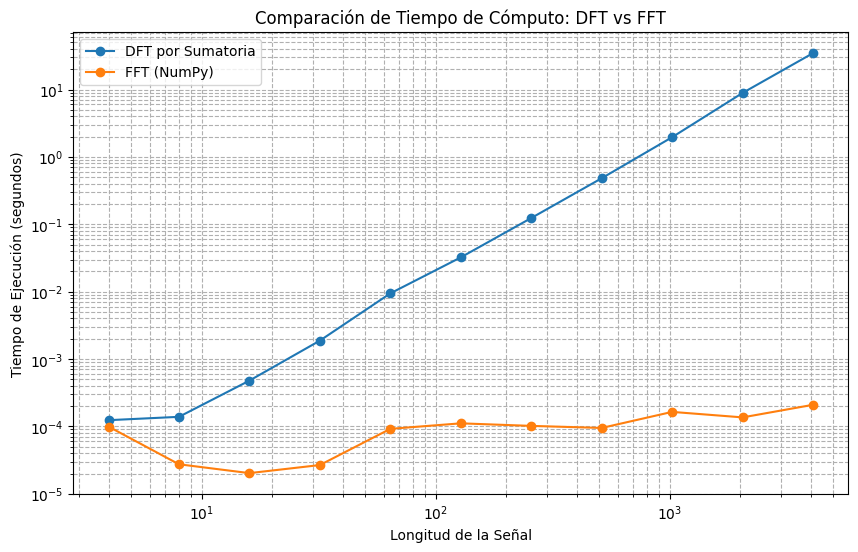

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Función para calcular la DFT por sumatoria directa
def dft_summation(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-2j * np.pi * n * k / N)
    return X

# Longitudes de señal a probar
signal_lengths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

dft_times = []
fft_times = []

for length in signal_lengths:
    # Generar una señal de prueba (por ejemplo, una señal aleatoria)
    signal = np.random.rand(length)

    # Medir tiempo para DFT por sumatoria
    start_time = time.time()
    dft_summation(signal)
    end_time = time.time()
    dft_times.append(end_time - start_time)

    # Medir tiempo para FFT de NumPy
    start_time = time.time()
    np.fft.fft(signal)
    end_time = time.time()
    fft_times.append(end_time - start_time)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(signal_lengths, dft_times, marker='o', label='DFT por Sumatoria')
plt.plot(signal_lengths, fft_times, marker='o', label='FFT (NumPy)')
plt.xlabel('Longitud de la Señal')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempo de Cómputo: DFT vs FFT')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

1.3 Encuentre la funcion de densidad espectral (transformada de ´
Fourier) para las siguientes senales (sin aplicar propiedades): ˜
$$a) e
−a|t|
, a∈R
+; b) cos (wct), wc∈R; c) sin (wst), ws∈R;
d) f(t) cos (wct), wc∈R, f(t)∈R,C; e) e
−a|t|
2
, a∈R
+. f)
Arectd(t), A, d∈R.$$


 Punto 3:

Consulte en qué consiste la frecuencia de -3dB y su relación con las frecuencias de corte en el filtrado espectral de señales.

**Solucion:**

La frecuencia de -3dB es un punto de referencia comúnmente utilizado en el análisis de sistemas y filtros, especialmente en procesamiento de señales. Representa la frecuencia en la que la magnitud de la respuesta en frecuencia de un sistema o filtro ha disminuido a aproximadamente 70.7% de su valor máximo en la banda de paso.

1.Decibelios (dB): Los decibelios son una unidad logarítmica utilizada para expresar la relación entre dos potencias o amplitudes. La fórmula para convertir una relación de amplitud a decibelios es:

$$ dB = 20 \log_{10} \left( \frac{A_{salida}}{A_{entrada}} \right) $$

donde $A_{salida}$ es la amplitud de la señal de salida y $A_{entrada}$ es la amplitud de la señal de entrada.

2.El significado de -3dB: Si la magnitud de la respuesta en frecuencia de un filtro es 0 dB en la banda de paso (lo que significa que la amplitud de salida es igual a la amplitud de entrada), un punto de -3dB significa que la amplitud de salida es $10^{-3/20} \approx 0.707$$10^{-3/20} \approx 0.707$ veces la amplitud de entrada. En términos de potencia, esto equivale a una reducción del 50% de la potencia (ya que la potencia es proporcional al cuadrado de la amplitud, $(0.707)^2 \approx 0.5$$(0.707)^2 \approx 0.5$).

**Relación con las frecuencias de corte en el filtrado espectral**

En el contexto del filtrado espectral, la frecuencia de -3dB se utiliza comúnmente para definir la frecuencia de corte de un filtro.

1.Frecuencia de corte: Es la frecuencia que marca la transición entre la banda de paso de un filtro (donde las frecuencias se atenúan mínimamente) y la banda de atenuación (donde las frecuencias se atenúan significativamente).

2.Uso de -3dB como frecuencia de corte: Para muchos tipos de filtros (como los filtros Butterworth), la frecuencia de -3dB se considera la frecuencia de corte estándar. En esta frecuencia, la energía de las señales comienza a reducirse notablemente.

3.Por qué -3dB: El valor de -3dB es una convención práctica. Representa un punto donde la señal ha sido atenuada a la mitad de su potencia en la banda de paso, lo cual es una reducción significativa y medible.

En resumen, la frecuencia de -3dB es una métrica clave en la respuesta en frecuencia de los filtros. Indica la frecuencia en la que la amplitud de la señal se reduce a aproximadamente 70.7% de su valor máximo en la banda de paso, y es comúnmente utilizada como la definición estándar de la frecuencia de corte de un filtro, marcando el inicio de la atenuación significativa de las frecuencias.

1.4.Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube

In [16]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
!pip install ffmpegimport numpy as np

import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
import os # Importar la librería os

# Install yt-dlp and ffmpeg if not already installed
try:
    import yt_dlp
    import ffmpeg
except ImportError:
    print("Installing yt-dlp and ffmpeg...")
    !pip install yt-dlp ffmpeg
    print("Installation complete.")


# Configura el enlace de tu video favorito de YouTube
link = https://youtu.be/jRGrNDV2mKc?si=z78vZ6e6gCLQ70yI
audio_filename_mp3 = "audio.mp3"
audio_filename_wav = "audio.wav"

# Descargar el audio del video
if not os.path.exists(audio_filename_mp3):
    print(f"Descargando audio de: {link}")
    !yt-dlp --extract-audio -o "{audio_filename_mp3}" --audio-format mp3 {link}
else:
    print(f"El archivo {audio_filename_mp3} ya existe, saltando descarga.")

# Convertir el audio a .wav
if not os.path.exists(audio_filename_wav):
    print(f"Convirtiendo {audio_filename_mp3} a {audio_filename_wav}")
    !ffmpeg -y -i {audio_filename_mp3} {audio_filename_wav}
else:
     print(f"El archivo {audio_filename_wav} ya existe, saltando conversión.")


# Leer el archivo .wav
try:
    x, fs = sf.read(audio_filename_wav)
    print(f'Frecuencia de muestreo: {fs} Hz')
    print(f'Forma del audio: {x.shape}')
except FileNotFoundError:
    print(f"Error: No se encontró el archivo de audio {audio_filename_wav}. Asegúrate de que la descarga y conversión fueron exitosas.")
    exit() # Salir si el archivo no se encuentra

# Seleccionar un segmento de 5 segundos
segment_duration = 30 # segundos
start_time_segment = 35 # Iniciar en el segundo 10 (puedes ajustar esto)
start_sample = int(start_time_segment * fs)
end_sample = int((start_time_segment + segment_duration) * fs)
xs = x[start_sample:end_sample, :]

# Asegurarse de que el segmento tiene al menos un canal
if xs.ndim == 1:
    xs = xs[:, np.newaxis] # Convertir a 2D si es mono

# Calcular la FFT del segmento
Xw = np.fft.rfft(xs, axis=0)
vf = np.fft.rfftfreq(np.size(xs, 0), 1/fs)

# --- Implementación de los filtros ---

# 1. Filtro Pasa Bajas (Low-Pass Filter)
print("\nAplicando Filtro Pasa Bajas...")
Xwf_lp = Xw.copy()
cutoff_lp = 500 # Frecuencia de corte en Hz (ajusta según necesites)
ind_lp = (vf > cutoff_lp)
Xwf_lp[ind_lp, :] = 0
xe_lp = np.fft.irfft(Xwf_lp, axis=0)

plt.figure()
plt.plot(vf, np.abs(Xw), label='Espectro Original')
plt.plot(vf, np.abs(Xwf_lp), label='Espectro Pasa Bajas')
plt.title(f'Espectro con Filtro Pasa Bajas (fc={cutoff_lp} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.show()

print("Audio Original:")
display(Audio(xs.T, rate=fs))
print("Audio Filtrado Pasa Bajas:")
display(Audio(xe_lp.T, rate=fs))


# 2. Filtro Pasa Altas (High-Pass Filter)
print("\nAplicando Filtro Pasa Altas...")
Xwf_hp = Xw.copy()
cutoff_hp = 1000 # Frecuencia de corte en Hz (ajusta según necesites)
ind_hp = (vf < cutoff_hp)
Xwf_hp[ind_hp, :] = 0
xe_hp = np.fft.irfft(Xwf_hp, axis=0)

plt.figure()
plt.plot(vf, np.abs(Xw), label='Espectro Original')
plt.plot(vf, np.abs(Xwf_hp), label='Espectro Pasa Altas')
plt.title(f'Espectro con Filtro Pasa Altas (fc={cutoff_hp} Hz)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.show()

print("Audio Filtrado Pasa Altas:")
display(Audio(xe_hp.T, rate=fs))

SyntaxError: invalid syntax (ipython-input-188019029.py, line 21)